In [1]:
import numpy as np
import matplotlib.pyplot as plt

<h2>Generate a simple training data set</h2>

In [2]:
def z_normalize(data):
    return (data - data.mean()) / data.std()

In [3]:
x = np.arange(0,8*np.pi, 0.001)
e1 = np.random.randn(len(x))
y = np.sin(x) + e1

In [4]:
x = z_normalize(x)
y = z_normalize(y)

In [5]:
train_idx = np.random.choice(np.arange(0,len(x)), 1000) 
train_x = np.array([x[idx] for idx in train_idx])
train_y = np.array([y[idx] for idx in train_idx])

test_idx = np.random.choice(np.arange(0,len(x)), 1000) 
test_x = np.array([x[idx] for idx in test_idx])
test_y = np.array([y[idx] for idx in test_idx])

train_x = np.reshape(train_x,[train_x.shape[0],1])
test_x = np.reshape(test_x,[test_x.shape[0],1])
train_y = np.reshape(train_y,[train_y.shape[0],1])
test_y = np.reshape(test_y,[test_y.shape[0],1])

train_x.shape

(1000, 1)

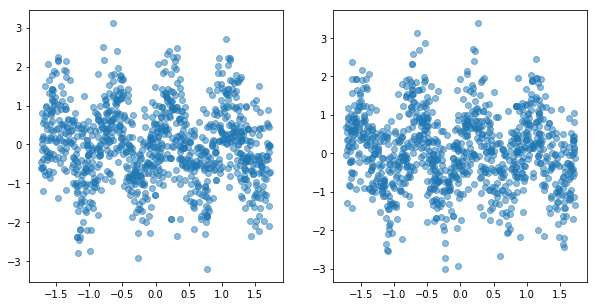

In [6]:
f, ax = plt.subplots(1,2, figsize = (10,5))
ax[0].scatter(train_x, train_y, alpha = 0.5)
ax[1].scatter(test_x, test_y,alpha = 0.5)
plt.show()

<h2> Ridge Regression Functions from exercise 4</h2>

In [7]:
def F_score(Y, Y_hat, beta):
    true_positives = sum(np.logical_and(Y == True, Y_hat == True))
    false_positives = sum(np.logical_and(Y == False, Y_hat == True))
    false_negatives = sum(np.logical_and(Y == True, Y_hat == False))
    
    precision =  true_positives / (true_positives + false_positives)
    recall = true_positives / (true_positives + false_negatives)
    F = (1 + beta**2) * precision * recall / (beta**2 * precision + recall)
    
    return F

In [8]:
def predict(X, theta):
    htheta = X.dot(theta)
    return htheta

In [7]:
def ridge_ll(X,Y,theta, delta):
    likelihood =  np.transpose(Y).dot(X.dot(theta)) -sum(np.log(np.ones([X.dot(theta).shape[0], 1]) +  np.exp(X.dot(theta)))) - 0.5 * delta * np.transpose(theta).dot(theta)
    return  likelihood

In [8]:
def deriva_ridge_ll(X, Y, htheta, delta, theta):
    
    deriva = np.transpose(X).dot(Y - htheta)
    deriva = deriva - delta * theta
    return deriva

In [22]:
def gradient_descent_solution(X_train, Y_train, delta):
    const = 0.00001
    #theta represents the regression coeficients, start with abitraty numbers
    theta = np.random.randn(X_train.shape[1]).reshape([X_train.shape[1],1])
    likelihood_old = -1e100
    converge_idx = 1.

    while converge_idx > 1e-3:
        cross_product = X_train.dot(theta)
        htheta = X_train.dot(theta)
        likelihood = ridge_ll(X_train, Y_train, theta, delta)

        #print(likelihood)
        converge_idx = (likelihood_old - likelihood) / likelihood_old
        likelihood_old = likelihood
        deriva = deriva_ridge_ll(X_train, Y_train, htheta, delta, theta)
        #print(deriva)
        theta = theta + const * deriva

    return theta

<h2>Fit a polynomial regression to the data set and visualize its predictions.</h2>

In [10]:
def polynom_transformation(x,p):
    x = x.reshape([x.shape[0],])
    X = np.transpose([ x**i for i in np.arange(0,p+1) ])
    return X

In [27]:
y_hat = polynom_transformation(test_x,p).dot(gradient_descent_solution(polynom_transformation(train_x,p), train_y, 0.5))
RSS = sum((test_y - y_hat)**2)
RSS


array([ 1007.07741064])

In [44]:
gradient_descent_solution(polynom_transformation(train_x,10), train_y, 0.5)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


array([[ -2.18417546e+00],
       [  1.37249020e-01],
       [ -1.28474755e+01],
       [  3.31308290e+00],
       [ -3.32634739e+01],
       [  9.88550813e+00],
       [ -9.09381210e+01],
       [  2.84707940e+01],
       [ -2.41992529e+02],
       [  7.71120649e+01],
       [ -6.56854152e+02]])

In [61]:
theta_list = []
RSS_list = []

for p in np.arange(0,20):
    for delta in np.arange(0.5,1.01,0.1):
        theta = gradient_descent_solution(polynom_transformation(train_x,p), train_y, delta)
        y_hat = polynom_transformation(test_x,p).dot(theta)
        RSS = sum((test_y - y_hat)**2)
        theta_list.append(theta)
        RSS_list.append(RSS)   
#RSS_mat = np.array(RSS_list).reshape([2, int(len(RSS_list) / 2)])      

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in true_divide
  
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in subtract
  


In [63]:
np.argmin(RSS_list)

11

In [64]:
RSS_list

[array([ 1084.13722499]),
 array([ 957.79358151]),
 array([ 957.7818349]),
 array([ 957.90643171]),
 array([ 2300.84439689]),
 array([ 1294.47380006]),
 array([ 1355.67146991]),
 array([ 4066.94361903]),
 array([ 5292.96796115]),
 array([ 2084.78721498]),
 array([ 1236.37614869]),
 array([ 950.66962079]),
 array([ 8318.57367674]),
 array([ 6534.13707811]),
 array([ 2237.23417948]),
 array([ 2494.86413463]),
 array([ 1087.62789917]),
 array([ 7989.65847517]),
 array([ 1009.54665556]),
 array([ 1076.13806697]),
 array([ 2204.94733447]),
 array([ 2019.40155201]),
 array([ 6955.22037581]),
 array([ 2188.46719906]),
 array([ 7503.57780485]),
 array([ 25451.17432344]),
 array([ 4098.12040934]),
 array([ 21171.06953654]),
 array([ 1307.36429761]),
 array([ 1059.91177348]),
 array([ 3580.2879673]),
 array([ 1132.69186874]),
 array([ 2318.99201187]),
 array([ 978.43673251]),
 array([ 2505.25200341]),
 array([ 1538.94685788]),
 array([ 10623.99219023]),
 array([ 1865.69513948]),
 array([ 1112.19

In [60]:
len(RSS_list)/11

6.0